<ipython-input-7-a6c8ffd7e515>:24: RuntimeWarning: divide by zero encountered in log10
  magnitude_fir_db = 20 * np.log10(np.abs(h_fir))


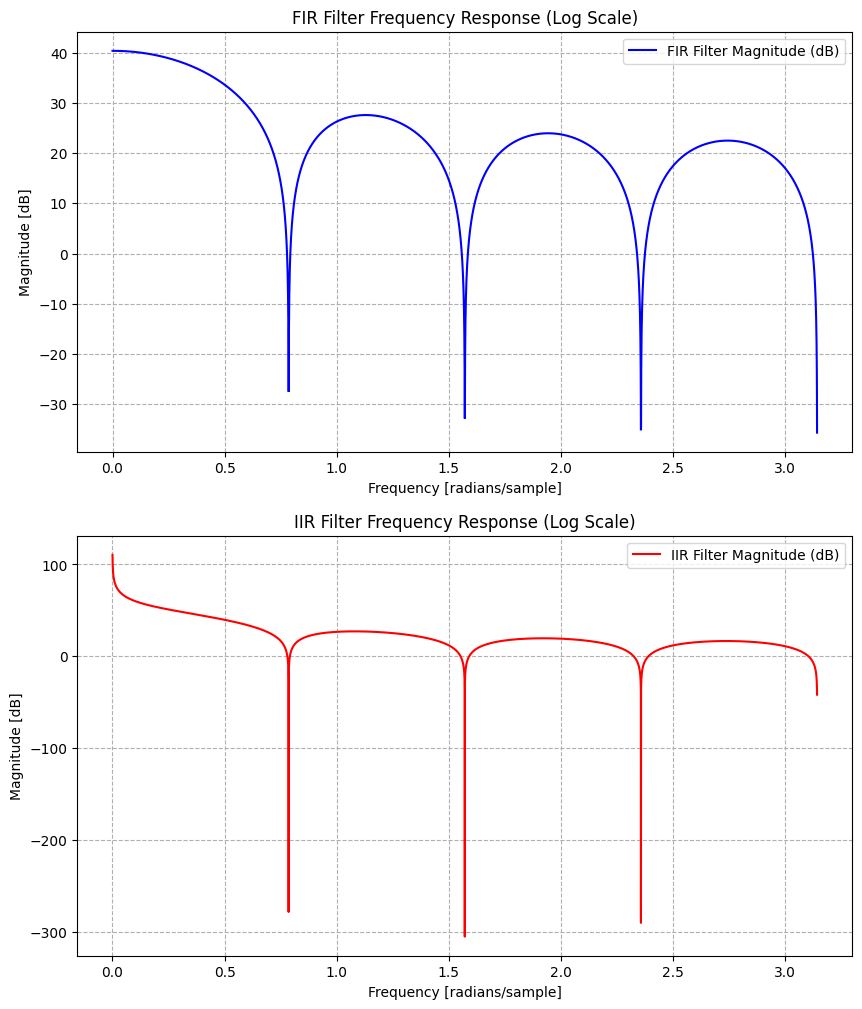

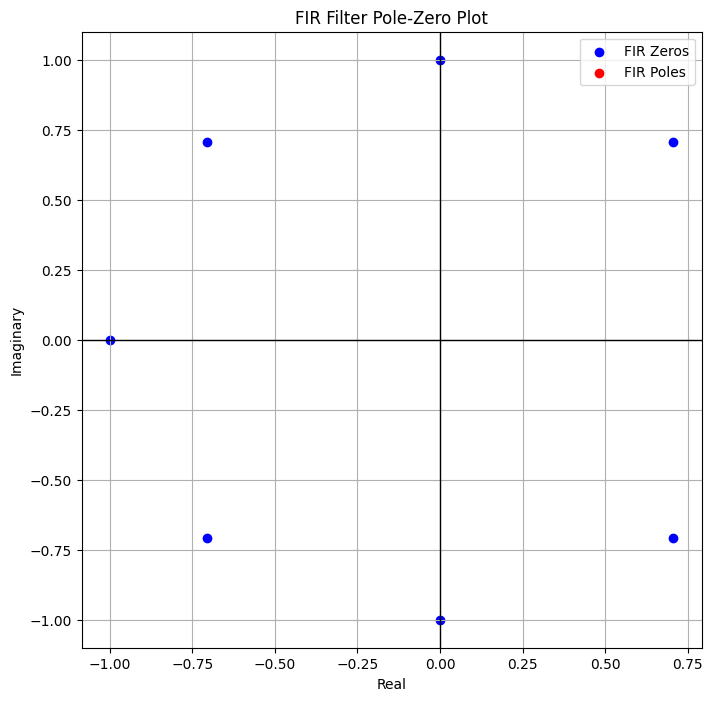

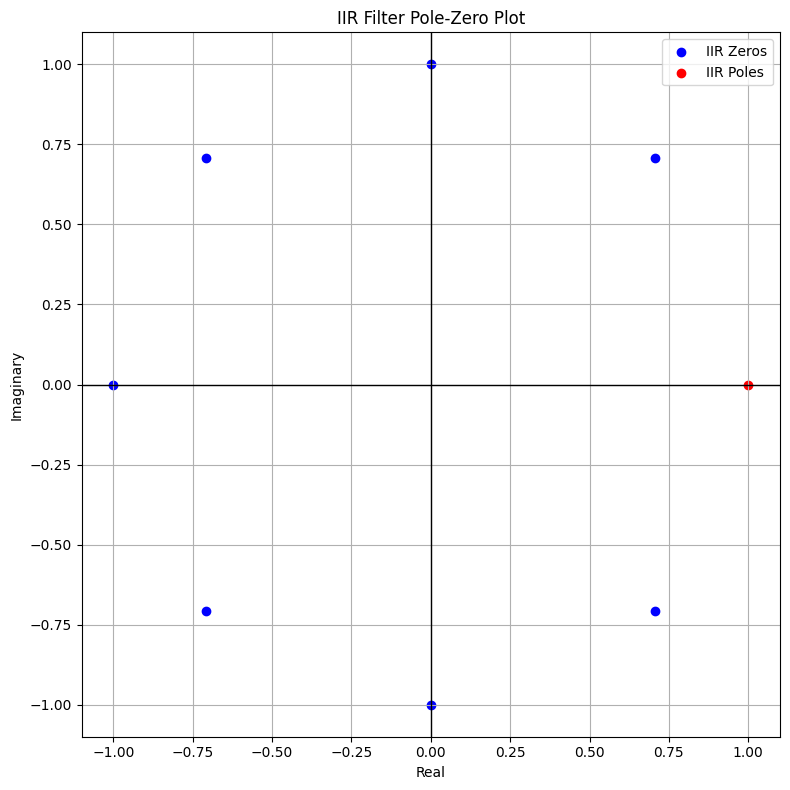


FIR Filter Poles:
[]

FIR Filter Zeros:
[ 7.07106781e-01+0.70710678j  7.07106781e-01-0.70710678j
 -1.00000000e+00+0.j         -7.07106781e-01+0.70710678j
 -7.07106781e-01-0.70710678j -2.77555756e-16+1.j
 -2.77555756e-16-1.j        ]

IIR Filter Poles:
[1.]

IIR Filter Zeros:
[ 7.07106781e-01+0.70710678j  7.07106781e-01-0.70710678j
 -1.00000000e+00+0.j         -7.07106781e-01+0.70710678j
 -7.07106781e-01-0.70710678j -2.77555756e-16+1.j
 -2.77555756e-16-1.j        ]


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqz, tf2zpk

# Given Parameters
T = 1 / (2.4 * 1e9)  # Clock period
N = 8
Cs = 15.925e-12  # Capacitance in Farads
K = T / (2 * Cs)  # Gain coefficient

# FIR Filter Coefficients
fir_b = K * np.array([1, 1, 1, 1, 1, 1, 1, 1])  # Numerator coefficients
fir_a = np.array([1])  # Denominator coefficients (no feedback)

# IIR Filter Coefficients
iir_b = K * np.array([1, 1, 1, 1, 1, 1, 1, 1])  # Numerator coefficients
iir_a = np.array([1, -1])  # Denominator coefficients

# Compute frequency response
w_fir, h_fir = freqz(fir_b, fir_a, worN=10000)
w_iir, h_iir = freqz(iir_b, iir_a, worN=10000)

# Convert magnitude to dB scale
magnitude_fir_db = 20 * np.log10(np.abs(h_fir))
magnitude_iir_db = 20 * np.log10(np.abs(h_iir))

# Compute poles and zeros
fir_zeros, fir_poles, fir_k = tf2zpk(fir_b, fir_a)
iir_zeros, iir_poles, iir_k = tf2zpk(iir_b, iir_a)

# Plot frequency response
fig, axs = plt.subplots(2, 1, figsize=(10, 12))

# FIR Filter Frequency Response (log scale)
axs[0].plot(w_fir, magnitude_fir_db, 'b', label='FIR Filter Magnitude (dB)')
axs[0].set_title("FIR Filter Frequency Response (Log Scale)")
axs[0].set_xlabel("Frequency [radians/sample]")
axs[0].set_ylabel("Magnitude [dB]")
axs[0].grid(True, which="both", linestyle="--")
axs[0].legend()

# IIR Filter Frequency Response (log scale)
axs[1].plot(w_iir, magnitude_iir_db, 'r', label='IIR Filter Magnitude (dB)')
axs[1].set_title("IIR Filter Frequency Response (Log Scale)")
axs[1].set_xlabel("Frequency [radians/sample]")
axs[1].set_ylabel("Magnitude [dB]")
axs[1].grid(True, which="both", linestyle="--")
axs[1].legend()

# Pole-Zero Plot for FIR Filter
fig_pz_fir, ax_pz_fir = plt.subplots(1, 1, figsize=(8, 8))
ax_pz_fir.scatter(np.real(fir_zeros), np.imag(fir_zeros), color='blue', label='FIR Zeros')
ax_pz_fir.scatter(np.real(fir_poles), np.imag(fir_poles), color='red', label='FIR Poles')
ax_pz_fir.set_title("FIR Filter Pole-Zero Plot")
ax_pz_fir.set_xlabel("Real")
ax_pz_fir.set_ylabel("Imaginary")
ax_pz_fir.axhline(0, color='black', linewidth=1)
ax_pz_fir.axvline(0, color='black', linewidth=1)
ax_pz_fir.legend()
ax_pz_fir.grid(True)

# Pole-Zero Plot for IIR Filter
fig_pz_iir, ax_pz_iir = plt.subplots(1, 1, figsize=(8, 8))
ax_pz_iir.scatter(np.real(iir_zeros), np.imag(iir_zeros), color='blue', label='IIR Zeros')
ax_pz_iir.scatter(np.real(iir_poles), np.imag(iir_poles), color='red', label='IIR Poles')
ax_pz_iir.set_title("IIR Filter Pole-Zero Plot")
ax_pz_iir.set_xlabel("Real")
ax_pz_iir.set_ylabel("Imaginary")
ax_pz_iir.axhline(0, color='black', linewidth=1)
ax_pz_iir.axvline(0, color='black', linewidth=1)
ax_pz_iir.legend()
ax_pz_iir.grid(True)

plt.tight_layout()
plt.show()

# Print Poles and Zeros
print("\nFIR Filter Poles:")
print(fir_poles)
print("\nFIR Filter Zeros:")
print(fir_zeros)
print("\nIIR Filter Poles:")
print(iir_poles)
print("\nIIR Filter Zeros:")
print(iir_zeros)


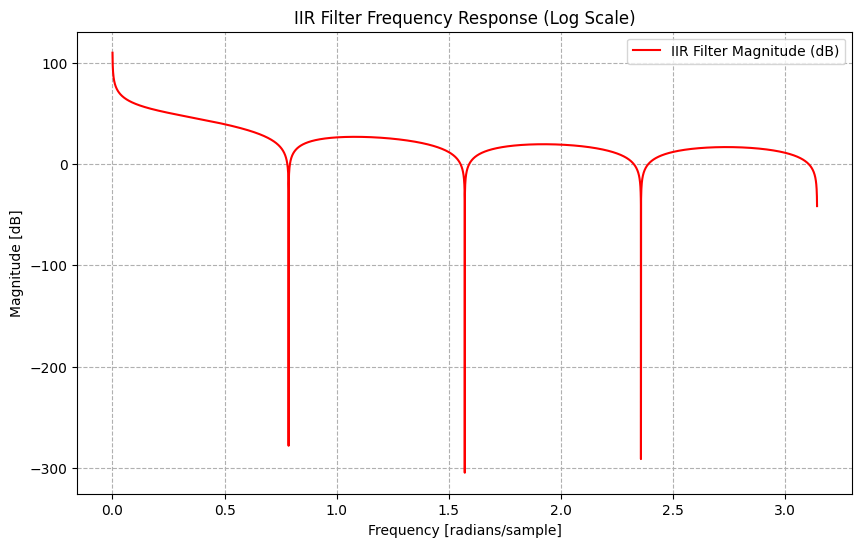

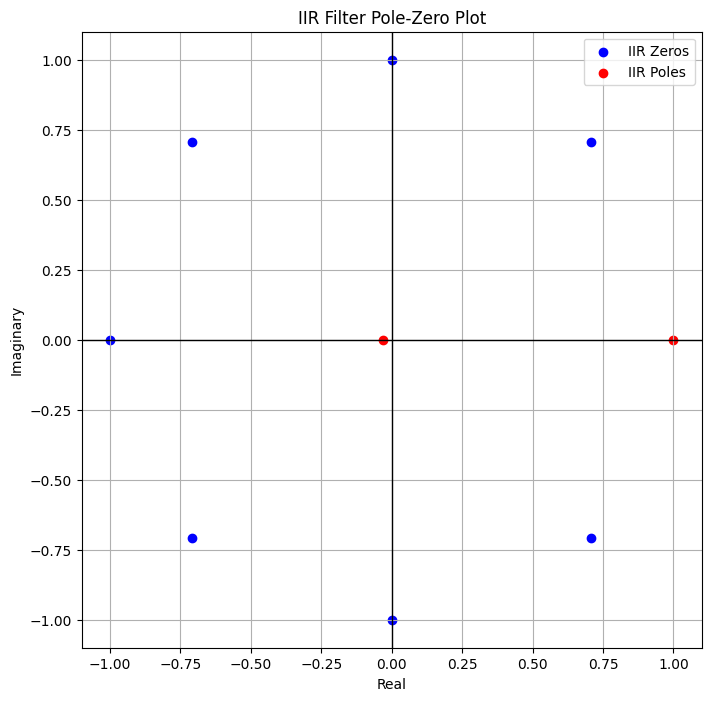


IIR Filter Poles:
[ 1.         -0.03139717]

IIR Filter Zeros:
[ 7.07106781e-01+0.70710678j  7.07106781e-01-0.70710678j
 -1.00000000e+00+0.j         -7.07106781e-01+0.70710678j
 -7.07106781e-01-0.70710678j -2.77555756e-16+1.j
 -2.77555756e-16-1.j        ]


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqz, tf2zpk

# Given Parameters
T = 1 / (2.4 * 1e9)  # Clock period
N = 8
Ch = 15.425e-12  # Capacitance in Farads
Cr = 0.5e-12  # Capacitance in Farads
K = T / (2 * (Ch + Cr))  # Gain coefficient
a1 = Ch/(Ch+Cr)

# IIR Filter Coefficients
iir_b = K * np.array([1, 1, 1, 1, 1, 1, 1, 1])  # Numerator coefficients
iir_a = np.array([1, -a1, -(1-a1)])  # Denominator coefficients

# Compute frequency response
w_iir, h_iir = freqz(iir_b, iir_a, worN=10000)

# Convert magnitude to dB scale
magnitude_iir_db = 20 * np.log10(np.abs(h_iir))

# Compute poles and zeros
iir_zeros, iir_poles, iir_k = tf2zpk(iir_b, iir_a)

# Plot frequency response
plt.figure(figsize=(10, 6))
plt.plot(w_iir, magnitude_iir_db, 'r', label='IIR Filter Magnitude (dB)')
plt.title("IIR Filter Frequency Response (Log Scale)")
plt.xlabel("Frequency [radians/sample]")
plt.ylabel("Magnitude [dB]")
plt.grid(True, which="both", linestyle="--")
plt.legend()
plt.show()

# Pole-Zero Plot for IIR Filter
plt.figure(figsize=(8, 8))
plt.scatter(np.real(iir_zeros), np.imag(iir_zeros), color='blue', label='IIR Zeros')
plt.scatter(np.real(iir_poles), np.imag(iir_poles), color='red', label='IIR Poles')
plt.title("IIR Filter Pole-Zero Plot")
plt.xlabel("Real")
plt.ylabel("Imaginary")
plt.axhline(0, color='black', linewidth=1)
plt.axvline(0, color='black', linewidth=1)
plt.legend()
plt.grid(True)
plt.show()

# Print Poles and Zeros
print("\nIIR Filter Poles:")
print(iir_poles)
print("\nIIR Filter Zeros:")
print(iir_zeros)


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Define the coefficients for the two terms of the transfer function
numerator1 = [1, 1, 1, 1, 1, 1, 1, 1]  # Coefficients for the first term (1 + z^-1 + z^-2 + ... + z^-7)
numerator2 = [1, 1, 1, 1]              # Coefficients for the second term (1 + z^-1 + z^-2 + z^-3)

# Multiply the two numerators (polynomials) to get the overall numerator
numerator = np.convolve(numerator1, numerator2)

# Denominator for the given system is 1 (no denominator polynomial provided, so it's 1)
denominator = [1]

print(numerator)
print(denominator)


[1 2 3 4 4 4 4 4 3 2 1]
[1]


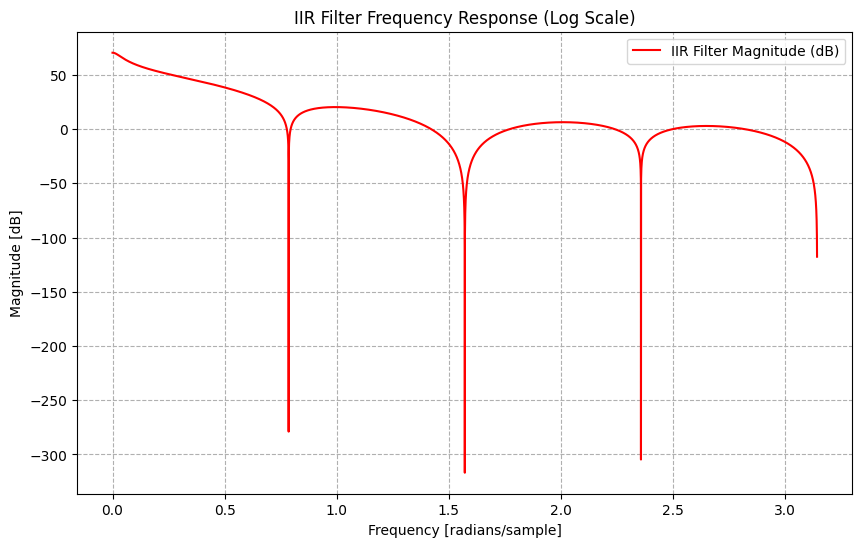

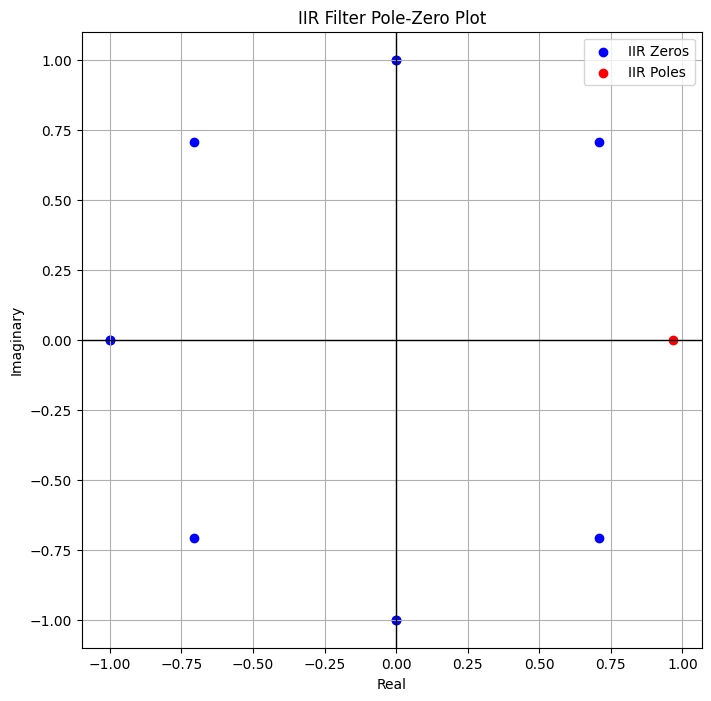


IIR Filter Poles:
[0.96860283]

IIR Filter Zeros:
[ 7.07106781e-01+0.70710678j  7.07106781e-01-0.70710678j
 -9.24633806e-09+1.00000001j -9.24633806e-09-1.00000001j
  9.24633953e-09+0.99999999j  9.24633953e-09-0.99999999j
 -7.07106781e-01+0.70710678j -7.07106781e-01-0.70710678j
 -9.99999981e-01+0.j         -1.00000002e+00+0.j        ]


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqz, tf2zpk

# Given Parameters
T = 1 / (2.4 * 1e9)  # Clock period
N = 8
Ch = 15.425e-12  # Capacitance in Farads
Cr = 0.5e-12  # Capacitance in Farads
K = T / (8 * (Ch + Cr))  # Gain coefficient
a1 = Ch/(Ch+Cr)

# IIR Filter Coefficients
iir_b = K * np.array([1, 2, 3, 4, 4, 4, 4, 4, 3, 2, 1])  # Numerator coefficients
iir_a = np.array([1, -a1])  # Denominator coefficients

# Compute frequency response
w_iir, h_iir = freqz(iir_b, iir_a, worN=10000)

# Convert magnitude to dB scale
magnitude_iir_db = 20 * np.log10(np.abs(h_iir))

# Compute poles and zeros
iir_zeros, iir_poles, iir_k = tf2zpk(iir_b, iir_a)

# Plot frequency response
plt.figure(figsize=(10, 6))
plt.plot(w_iir, magnitude_iir_db, 'r', label='IIR Filter Magnitude (dB)')
plt.title("IIR Filter Frequency Response (Log Scale)")
plt.xlabel("Frequency [radians/sample]")
plt.ylabel("Magnitude [dB]")
plt.grid(True, which="both", linestyle="--")
plt.legend()
plt.show()

# Pole-Zero Plot for IIR Filter
plt.figure(figsize=(8, 8))
plt.scatter(np.real(iir_zeros), np.imag(iir_zeros), color='blue', label='IIR Zeros')
plt.scatter(np.real(iir_poles), np.imag(iir_poles), color='red', label='IIR Poles')
plt.title("IIR Filter Pole-Zero Plot")
plt.xlabel("Real")
plt.ylabel("Imaginary")
plt.axhline(0, color='black', linewidth=1)
plt.axvline(0, color='black', linewidth=1)
plt.legend()
plt.grid(True)
plt.show()

# Print Poles and Zeros
print("\nIIR Filter Poles:")
print(iir_poles)
print("\nIIR Filter Zeros:")
print(iir_zeros)


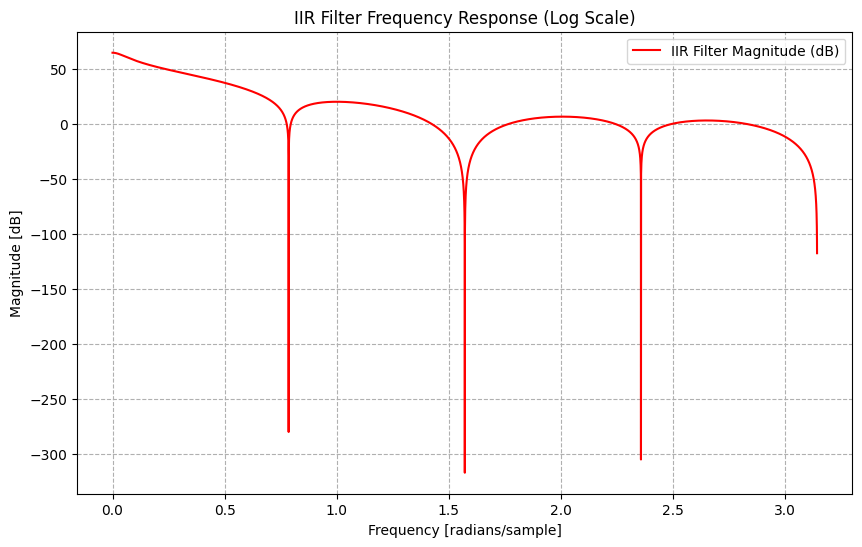

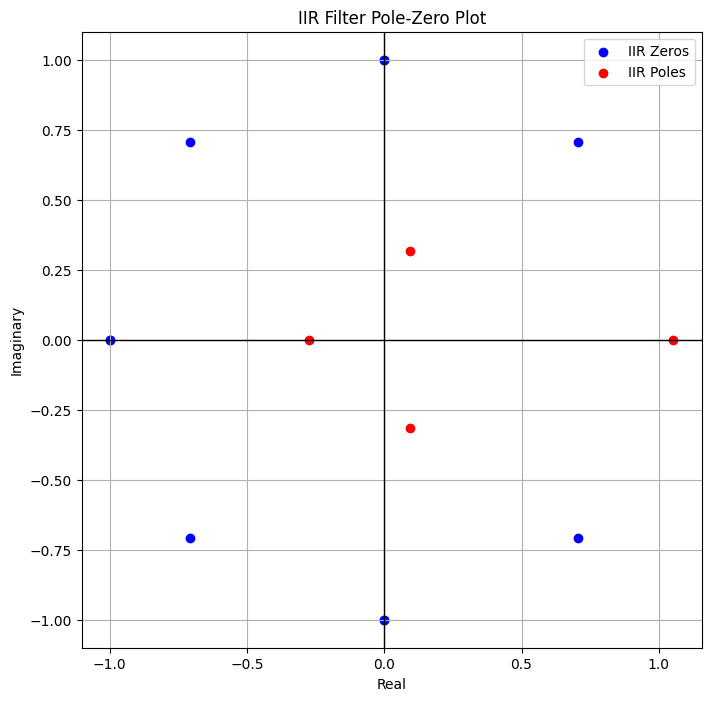


IIR Filter Poles:
[ 1.05354096+0.j          0.09387633+0.31697678j  0.09387633-0.31697678j
 -0.27269079+0.j        ]

IIR Filter Zeros:
[ 7.07106781e-01+0.70710678j  7.07106781e-01-0.70710678j
 -9.24633806e-09+1.00000001j -9.24633806e-09-1.00000001j
  9.24633953e-09+0.99999999j  9.24633953e-09-0.99999999j
 -7.07106781e-01+0.70710678j -7.07106781e-01-0.70710678j
 -9.99999981e-01+0.j         -1.00000002e+00+0.j        ]


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqz, tf2zpk

# Given Parameters
T = 1 / (2.4 * 1e9)  # Clock period
N = 8
Ch = 15.425e-12  # Capacitance in Farads
Cr = 0.5e-12  # Capacitance in Farads
K = T / (8 * (Ch + Cr))  # Gain coefficient
a1 = Ch/(Ch+Cr)

# IIR Filter Coefficients
iir_b = K * np.array([1, 2, 3, 4, 4, 4, 4, 4, 3, 2, 1])  # Numerator coefficients
iir_a = np.array([1, -a1, -(1-a1), -(1-a1), -(1-a1)])  # Denominator coefficients

# Compute frequency response
w_iir, h_iir = freqz(iir_b, iir_a, worN=10000)

# Convert magnitude to dB scale
magnitude_iir_db = 20 * np.log10(np.abs(h_iir))

# Compute poles and zeros
iir_zeros, iir_poles, iir_k = tf2zpk(iir_b, iir_a)

# Plot frequency response
plt.figure(figsize=(10, 6))
plt.plot(w_iir, magnitude_iir_db, 'r', label='IIR Filter Magnitude (dB)')
plt.title("IIR Filter Frequency Response (Log Scale)")
plt.xlabel("Frequency [radians/sample]")
plt.ylabel("Magnitude [dB]")
plt.grid(True, which="both", linestyle="--")
plt.legend()
plt.show()

# Pole-Zero Plot for IIR Filter
plt.figure(figsize=(8, 8))
plt.scatter(np.real(iir_zeros), np.imag(iir_zeros), color='blue', label='IIR Zeros')
plt.scatter(np.real(iir_poles), np.imag(iir_poles), color='red', label='IIR Poles')
plt.title("IIR Filter Pole-Zero Plot")
plt.xlabel("Real")
plt.ylabel("Imaginary")
plt.axhline(0, color='black', linewidth=1)
plt.axvline(0, color='black', linewidth=1)
plt.legend()
plt.grid(True)
plt.show()

# Print Poles and Zeros
print("\nIIR Filter Poles:")
print(iir_poles)
print("\nIIR Filter Zeros:")
print(iir_zeros)
